# Heart data set 


imports

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# READING THE DATASET

In [2]:
df = pd.read_csv('heartheart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# plotting the correlation matrics

<Axes: >

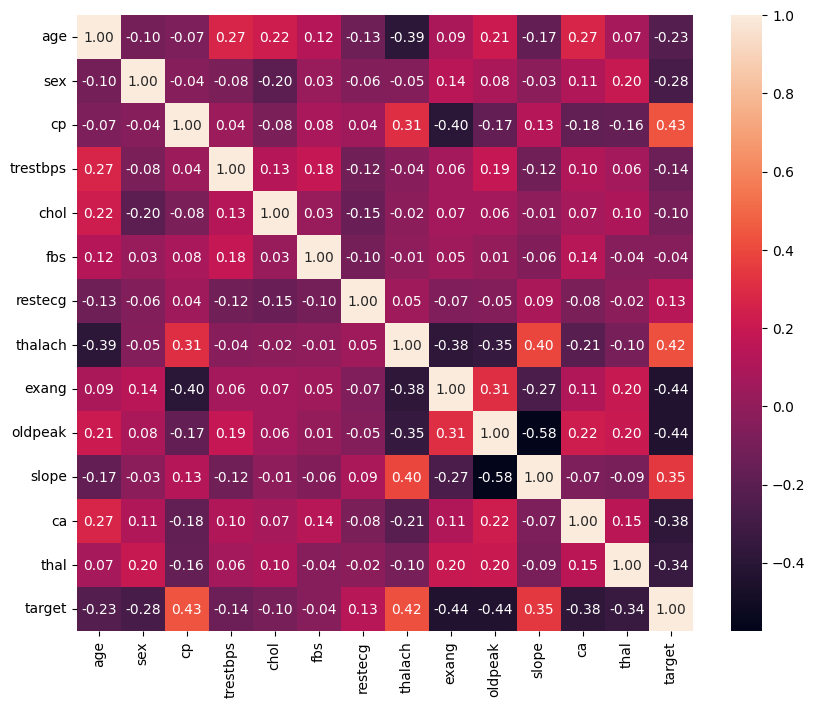

In [4]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', square=True)


# Assignment 06 : Perform KNN, SVM and Decision Tree classifier to predict the heart disease based on the attached dataset. Also perform comparative study among the models.

In [5]:
X  = df.drop(columns=['target', 'fbs'])
y = df['target']

# splitting the dataset

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Applying the decisiontree classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.985


Applying the knn classifier 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")


KNN Accuracy: 0.72


Applying the svm algorithm

In [9]:
from sklearn import svm
svm = svm.SVC(kernel = 'linear', C = 1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")



SVM Accuracy: 0.80


# plotting the comparision for various models accuracy

<Axes: >

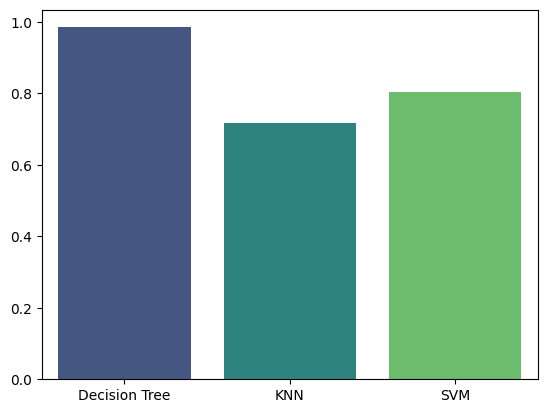

In [10]:
sns.barplot(x=['Decision Tree', 'KNN', 'SVM'], y=[accuracy, accuracy_knn, accuracy_svm], palette='viridis',hue=['Decision Tree', 'KNN', 'SVM'])
